# Detecting depression in Tweets using Baye's Theorem

# Installing and importing libraries

In [101]:
!pip install wordcloud
!pip install nltk

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

distributed 1.22.0 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
distributed 1.22.0 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[nltk_data] Downloading package punkt to /home/aritra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/aritra/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Loading the Data

In [102]:
tweets = pd.read_csv('sentiment_tweets3.csv')
tweets.tail(20)

,Unnamed: 0,message,label
10294,802294,"Fuck depression, it should honestly just kill ...",1
10295,802295,I love Lauren so much <Emoji: Loudly crying fa...,1
10296,802296,fvck that depression,1
10297,802297,suffering from chronic depression https://vine...,1
10298,802298,"And I guess, I just have to make sacrifices if...",1
10299,802299,Engaging in physical activity decreases people...,1
10300,802300,"depression: i'm always here for u, darling",1
10301,802301,"I'm suffering from depression, I'm thankful th...",1
10302,802302,More than one in 20 US children and teens have...,1
10303,802303,IM GOING TO SEE @HayleyKiyoko NEXT WEEK IN CHI...,1


In [49]:
temp = tweets.loc[tweets['label']==1]
l1 = temp["message"].tolist()

In [100]:
len(l1)

2314

In [51]:
l2 = " ".join(l1)

In [78]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
words = word_tokenize(l2)
wordsfilter = []
stopWords = set(stopwords.words('english'))
for w in words:
    if w not in stopWords:
        wordsfilter.append(w)
#print(wordsfilter)
#ps = PorterStemmer()
#wordsstem =[]
#for item in wordsfilter:
#    wordsstem.append(ps.stem(item))
vectorizer.fit(wordsfilter)
d=dict(vectorizer.vocabulary_)

In [99]:
wordsfilter

['The',
 'lack',
 'understanding',
 'small',
 'significant',
 'part',
 'causes',
 'anxiety',
 '&',
 'depression',
 'feel',
 'incredibly',
 'lonely',
 '.',
 'It',
 "'s",
 'soooo',
 'easy',
 'compare',
 '.',
 'It',
 "'s",
 'easy',
 'invalidate',
 '.',
 'told',
 'parents',
 'depression',
 "'s",
 'hard',
 'get',
 'gen',
 'x',
 'people',
 'understand',
 'something',
 'control',
 'time',
 'cure',
 'walk',
 'keeping',
 'mind',
 'busy',
 'depression',
 'something',
 "n't",
 'speak',
 'even',
 'going',
 "'s",
 'also',
 'double',
 'edged',
 'sword',
 '.',
 'love',
 'every',
 'race',
 '.',
 'even',
 'white',
 'people',
 'done',
 'much',
 'ca',
 "n't",
 'hate',
 '.',
 'grandma',
 'legit',
 'white',
 '!',
 'tf',
 'hate',
 ',',
 'dislike',
 'people',
 'though',
 '.',
 'Made',
 'tortilla',
 'filled',
 'pb',
 '&',
 'j',
 '.',
 'My',
 'depression',
 'cured',
 '.',
 'Olivia:1',
 'depression:0',
 '@',
 'WorldofOutlaws',
 'I',
 'gon',
 'na',
 'need',
 'depression',
 'meds',
 'soon',
 ',',
 'rainouts',
 's

In [92]:
for item in l1:
    if (item.find("zimmer")!=-1):
        print(item)
        print("\n")

In [23]:
sc = str(tweets['message'])

In [24]:
sc.split('\n')

['0        just had a real good moment. i missssssssss hi...',
 '1               is reading manga  http://plurk.com/p/mzp1e',
 '2        @comeagainjen http://twitpic.com/2y2lx - http:...',
 "3        @lapcat Need to send 'em to my accountant tomo...",
 '4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder',
 '5                    so sleepy. good times tonight though ',
 '6        @SilkCharm re: #nbn as someone already said, d...',
 '7                       23 or 24ï¿½C possible today. Nice ',
 '8              nite twitterville  workout in the am  -ciao',
 "9          @daNanner Night, darlin'!  Sweet dreams to you ",
 '10                                Good morning everybody! ',
 '11       Finally! I just created my WordPress Blog. The...',
 '12       kisha they cnt get over u til they get out frm...',
 '13       @nicolerichie Yes i remember that band, It was...',
 '14                  I really love reflections and shadows ',
 "15       @blueaero ooo it's fantasy?  i like fantasy 

In [9]:
txt = "sad,sorrow,despair,grief,hopeless,hopelessness,helpless,abuse,alone,lonely,solitary,anger,anguish,fear,terrified,afraid,panic,struggle,suicide,tragic,tragedy,troubled,worry"

In [10]:
lst = txt.split(",")

In [31]:
import pandas as pd

In [45]:
df_pos = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",header=None)

In [47]:
df_pos.head(3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [52]:
(df_pos[5][df_pos[0]==4]).sample(10000)

981726     Nice weekedn in Yorkshire, apart from my Grand...
1066627             summer + sun +tan = a very happy kirsty 
819020     @Arbenting I've downloaded StumbleUpon but nev...
884697     Just got Home! Playing Drums on Rock Band 2 wi...
1130826    Graffiti message left along Potomac, eyeroll. ...
1234756    Ahh.! What a day.!  We won.!  1st place in dan...
1070502    @tarl @colstoncopeland Not disappointing. It's...
1396511                       no lanes again! but it's okay 
1318021    @Popsicle21 definitely   now there's two peopl...
807604      three more days until California and Tova time! 
1176121    Missing the lil guy already, he still smelled ...
1215987    @epigunya NP.  I really wish I could work for ...
887653     I look like a lost redneck walking in Obama's ...
898534        pianooo lessons soon  hows everyone afternoon?
988909            Just put in a pre-order for BSG Season 4! 
1069060    hahaha no were gonna watch the terminator at 6...
1199953    @musicalninja

In [195]:
dfw_1 = pd.read_csv('word_abuse.csv',usecols=['id','tweet'])
dfw_2 = pd.read_csv('word_afraid.csv',usecols=['id','tweet'])
dfw_3 = pd.read_csv('word_alone.csv',usecols=['id','tweet'])
dfw_4 = pd.read_csv('word_anger.csv',usecols=['id','tweet'])
dfw_5 = pd.read_csv('word_anguish.csv',usecols=['id','tweet'])
dfw_6 = pd.read_csv('word_anxiety.csv',usecols=['id','tweet'])
dfw_7 = pd.read_csv('word_anxious.csv',usecols=['id','tweet'])
dfw_8 = pd.read_csv('word_depressed.csv',usecols=['id','tweet'])
dfw_9 = pd.read_csv('word_depression.csv',usecols=['id','tweet'])
dfw_10 = pd.read_csv('word_despair.csv',usecols=['id','tweet'])
dfw_11 = pd.read_csv('word_fear.csv',usecols=['id','tweet'])
dfw_12 = pd.read_csv('word_grief.csv',usecols=['id','tweet'])
dfw_13 = pd.read_csv('word_helpless.csv',usecols=['id','tweet'])
dfw_14 = pd.read_csv('word_hopeless.csv',usecols=['id','tweet'])
dfw_15 = pd.read_csv('word_hopelessness.csv',usecols=['id','tweet'])
dfw_16 = pd.read_csv('word_lonely.csv',usecols=['id','tweet'])
dfw_17 = pd.read_csv('word_panic.csv',usecols=['id','tweet'])
dfw_18 = pd.read_csv('word_sad.csv',usecols=['id','tweet'])
dfw_19 = pd.read_csv('word_solitary.csv',usecols=['id','tweet'])
dfw_20 = pd.read_csv('word_sorrow.csv',usecols=['id','tweet'])
dfw_21 = pd.read_csv('word_struggle.csv',usecols=['id','tweet'])
dfw_22 = pd.read_csv('word_suicide.csv',usecols=['id','tweet'])
dfw_23 = pd.read_csv('word_terrified.csv',usecols=['id','tweet'])
dfw_24 = pd.read_csv('word_tragedy.csv',usecols=['id','tweet'])
dfw_25 = pd.read_csv('word_tragic.csv',usecols=['id','tweet'])
dfw_26 = pd.read_csv('word_troubled.csv',usecols=['id','tweet'])
dfw_27 = pd.read_csv('word_worry.csv',usecols=['id','tweet'])
#df_depress_1 = pd.concat([dfw_1,dfw_2,dfw_3,dfw_4,dfw_5,dfw_6,dfw_7,dfw_8,dfw_9,dfw_10,dfw_11,dfw_12,dfw_13,dfw_14,dfw_15,dfw_16,dfw_17,dfw_18,dfw_19,dfw_20,dfw_21,dfw_22,dfw_23,dfw_24,dfw_25,dfw_26,dfw_27])

In [4]:
len(txt_less_words)

23

In [1]:
txt_less_words = ["anxious","sad","sorrow","despair","grief","hopeless","hopelessness","helpless","abuse","alone","lonely","solitary","anger","anguish","fear","terrified","afraid","panic","struggle","tragic","tragedy","troubled","worry"]
txt_more_words = ["depression","depressed","anxiety","suicide"]
#d_list =[dfw_1,dfw_2,dfw_3,dfw_4,dfw_5,dfw_6,dfw_7,dfw_8,dfw_9,dfw_10,dfw_11,dfw_12,dfw_13,dfw_14,dfw_15,dfw_16,dfw_17,dfw_18,dfw_19,dfw_20,dfw_21,dfw_22,dfw_23,dfw_24,dfw_25,dfw_26,dfw_27]

In [197]:
from collections import OrderedDict
dep_dict =OrderedDict([])
for d in d_list:
    for i in range(len(d)) : 
        key = d.loc[i,'id']
        twee = d.loc[i,'tweet']
        
        count_main =0
        count_less =0
        for item in txt_more_words:
            if item in twee:
                count_main = count_main+1
        for item in txt_less_words:
            if item in twee:
                count_less = count_less+1
        if ((count_main>1)or(count_main==1 and count_less>=1) or (count_less>=3)):
            dep_dict[key] = twee

In [198]:
#dep_tweet_data = pd.DataFrame(columns=['id','tweet'])
lst_dep = []
for t in dep_dict.values():
    lst_dep.append(t)

In [199]:
import numpy as np

In [200]:
np_lst_dep = np.array(lst_dep)

In [176]:
np.savetxt('depression_tweets.csv',np_lst_dep,delimiter='\n',fmt="%s")

In [201]:
len(np_lst_dep)

922

In [156]:
len("Domestic abuse happens all the time and not just exclusively to women, it's so sad that when it happens to men it just gets shrugged off :")

138

In [167]:
np_lst_dep[-2]

"lol don't worry I don't have a date for homecoming #foreveralone"

In [202]:
dep_tweet_pd = pd.DataFrame({'tweet':np_lst_dep})

In [203]:
dep_tweet_pd.to_csv("depressed_tweets.csv")

In [132]:


! pip install twint



    100% |████████████████████████████████| 1.2MB 704kB/s ta 0:00:011
    100% |████████████████████████████████| 204kB 12.4MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 453kB/s ta 0:00:011
    100% |████████████████████████████████| 102kB 655kB/s a 0:00:011
    100% |████████████████████████████████| 256kB 489kB/s ta 0:00:01
    100% |████████████████████████████████| 317kB 753kB/s ta 0:00:01
    100% |████████████████████████████████| 204kB 730kB/s ta 0:00:01
  Running setup.py bdist_wheel for twint ... done
  Stored in directory: /home/aritra/.cache/pip/wheels/b0/e4/f8/5e8b2a0e6e781c24cba90caeb3531e9c4077a1417cb2b2d497
  Running setup.py bdist_wheel for fake-useragent ... done
  Stored in directory: /home/aritra/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Running setup.py bdist_wheel for idna-ssl ... done
  Stored in directory: /home/aritra/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfull

In [17]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()
#c = twint.Config()

distributed 1.22.0 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [168]:
lst5 = ["depression"]

In [18]:
import twint
c = twint.Config()

In [30]:

c.Search= "anguish"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_anguish.csv"
twint.run.Search(c)



c.Search= "fear"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_fear.csv"
twint.run.Search(c)

c.Search= "terrified"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_terrified.csv"
twint.run.Search(c)



c.Search= "afraid"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_afraid.csv"
twint.run.Search(c)

c.Search= "panic"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_panic.csv"
twint.run.Search(c)



c.Search= "struggle"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_struggle.csv"
twint.run.Search(c)

c.Search= "suicide"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_suicide.csv"
twint.run.Search(c)



c.Search= "tragic"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_tragic.csv"
twint.run.Search(c)

c.Search= "tragedy"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_tragedy.csv"
twint.run.Search(c)



c.Search= "troubled"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_troubled.csv"
twint.run.Search(c)

c.Search= "worry"
c.Format = "{tweet}"
c.Pandas = True
c.Store_csv = True
c.Limit = 25
c.Since = "2015-01-01"
c.Until = "2016-12-31"
c.Links = "exclude"
c.Lang = "en"
c.Output = "word_worry.csv"
twint.run.Search(c)




#df_pd = twint_to_pandas(["date","username","tweet","hashtags","nlikes"])

@LitheLeither @BigGfaetheBigG @rogerlwhite Anguish and No Way José for services to infidelity?
@kevinmenzel Hey - taking my cue from you I finally wired my apartment up. Goodbye wi-fi interruptions & goodbye anguish - thanks!
"You have fulfilled me enough with your voice of anguish. I will orgasm if I gouge your eyes out as well."
Tonight I am in deep anguish and need to call on the Lord.
I've never owned a pet so I can't even imagine the anguish & uncertainty. So very sorry for you & Noodles. My prayers to u. 😟 🙏❤😿
I can't wait to hit my first vlog in FaZe
that's why I'm joining FaZe not red
Sorry to everyone in the surrounding hotel rooms that heard my scream of anguish watching Bug's end zone drop.
So much anguish that happens during adolescence could be avoided if we just taught kids early on to be introspective and communicate
and I am always tearing sutures out to make the anguish last
2016 taught me to be single for as longgg as possible. I don't have time for mental anguish and

We know firsthand the anguish his friends, family, teachers & classmates are facing. This didn’t have to happen, it should not have happened
Trump should call for making all illegal immigrants citizens immediately & watch hypocrite Democratic insiders howl with anguish! @newshour
Turnbull eats his phone in anguish like the  time pica effected Tony Abbott eating a raw onion about the same shitty pretence of good govt
IM IN EMOTIONAL ANGUISH
The latest below board is the source for 99% of my recent anguish and I'm not sure I'm comfortable saying it publicly NT
48:717 To ease the anguish of a torturing hour? Call @PhilostrateBot. #AMNDBots
I can understand that blokes anguish about Dean Cox leaving Orient. I still clap on the 14th minute of every hour for Mark Roberts.
It supposed to get kinda chilly tonight 😁
not a parent, but I'd imagine wheat would be a good curriculum tool for explaining anguish, regret, and poverty as well
Bolt or had a rush of the struggle against anguish a hurtful 

Eps 2-12. EXACTLY the same but with more Souls Stress, Souls Anguish, and Souls Rage, but also the Souls Joyous Satisfaction of Progressu!
Me and @anguish_og are making a team DM me if interested 10 players, 5 GFX, and 5 editors.
(2/4)  NEED THAT HOME I DREAM ABOUT AN ARTICULATE COACH SO YOU ALL CAN UNDERSTAND MY ANGUISH..HARDSHIP ALL I HAVE LOST OVER THE YEARS..IT...
@Fluxkerry77 is the captain now, always dead anguish, stupidly active towards a human-free world.
Ho Lord! A masterful season @WalkingDead_AMC but making us anguish for 7 months!!?? Not right.
We only grow from anguish.
You start to become nice again and someone has to remind you the world loves anguish. It's actually pretty funny
abashed abhor abstain ailment anguish archaic outset baffle ambivalent prone bestow
Oh yay, our bullpen is bringing the anguish as early as game one this year
@Tundrake *high-pitched adorable squealing* This is true anguish. 🙃
@Jordon2015 I'll let you take me on a walk....
@Wariobot_ is a warnin

Dear Tried and True Crew Fans Like Myself,  It's been a rough, but exhilarating 6 weeks. Put all that anguish behind us now. It's Cup time.
You Knw d pain & anguish dt is in my heart over a variety of issues in my life Lord I gv them all up 2 You bcos ONLY You Can Deal wt all 4me
Hold fast to dreams for if dreams die, life is a broken-winged bird that cannot fly. Ideologies separate us. Dreams and anguish bring us tog
@alcanlin her cheeks flushed and her brow deeply furrowed in anguish
OOC: Doomhammer/Scepter, Stromkar, Light's Wrath, Fists of the Heavens, Ebonchill, The Silver Hand/Ashbringer, Anguish & Sorrow... #busytime
@joshgreenman that student is one of thousands of intellectual midgets who desire to kill of free speech to avoid mental "anguish." Sad.
Father, heed the anguish of those who cry out to you with your Son:  ‘My God, my God, why have you forsaken me?’ #Vespers
@AndrewDruid @DaiDOLLASIGNy Anguish "attack daisy" gurrlll you gotta secret admirer
@thatsue2 @ShawnTheAtheis

Hanley in anguish after fouling pitch off left knee
Now that's a sound I can get behind.  #anguish
A boy of anguish now he's a man of soul traded in his misery for the lonely life of the road
@KerplunkItKel to be fair drawing the ear would've caused me a lot of mental anguish too but that diagram and labels that i'll never use...💔
A boy of anguish now, he's a man of soul Traded in his misery for the lonely life of the road
Myself through the anguish you forced upon me all those years. You had your chance and you ruined it" he eyes stayed ~ @_Amora_Enchant
Mental anguish is bad too. Shrug.
@v_johnsonn yes! Like other said sea salt spray will help, they are hard to get rid of  but if you dont mess with it it'll go away!
@v_johnsonn @MacPack16 it's a Keloid!
The anguish that smote my heart
@ReadyBlade • She was too much in anguish to sense the newcomer's presence and bit back her sobs. "I... /loved/ you. Didn't that mean -
@daniel_barker I know :( It's good to decide what you have control

In Luke 22:44 we're told how Jesus sweated blood, such was His anguish.  #obedience
the anguish I had to go through during my training back then ohhh my goddd
For 3 weeks, Daniel mourned in his prayer over Jerusalem. He was in anguish for change in his people. #Desperation #Fast21 #RevoltUSA
Have anguish for the people you're believing to be saved, and changed. Concern is not enough. There must be passion. #21Fast #3cUSA
@eX_T0URNEYS @JVen_eX @HeyImChance @Anguish_eX playing the ex tourney it should be fun !! ;)
@eX_T0URNEYS @HeyImChance @Anguish_eX might play in the tourney later
@BroWithTheFr0 i can hear the screams of anguish already xP
@AnguisH_O2 both
Yeah @teamspeak is 10x better than Skype
@Jackel951 I was in a world of pain & anguish before, drinking is lame
@anguish_o2 nahh
@anguish_o2 get a creddy yes
The Patriots give me so much Anger,Joy,Anguish,Happiness,Depression,Pride all in the same instance 😌😌😌
Forget about Spiderman, Superman, and Batman. I'll be your man.
Benefactre

Those who have nothing to hide have nothing to fear from police...but we all have things to hide, don't we?
what I would hope my response would be vs. what my actual response would be are two different things, I fear
RC is the fear
Rule #1 of retail: never let the customer know they got to you. They can smell fear.
Main stream Media. Don't fear the loss of subscribers. Fear a Trump Presidency and the disaster it would be.
@BostonGlobe @TracyJan  we are being told we are irrational to fear a thing venerated by a billion people which requires us fearing it.
Maybe I'm my own greatest fear.
My front camera on my phone stopped working and if I don't see my face in some sort of snapchat filter within a week I fear I may die
Do not let a fear surrounds you when you are falling in love someone.
fear not, vawls prevail
The way Indian media can’t raise Q abt de false “surgical strike”, de same way Pakistani media can’t raise Q abt “Zarb-e-Azb” out of fear.
clowns are like my number 1 fear
@616Se

"Sometimes you gotta get through the fear to see the beauty on the other side"
my fear for the presidential election trumps my fear for ap exams. haha get it.
27. what's your biggest fear
Quality not quantity
@magnumconDOM fear nothing but God
Like I don't trust men, I have a big fear of intimacy but crave it above all else, and I no longer know who I am thanks to two people
@ayylimao the fear is real
The purpose of fear is to raise your awareness, not to stop your progress. - Steve Maraboli #quote
@_BeTheOverflow saying the wrong thing is my biggest fear. I have to tell people not to abandon the friendship if I do and to talk it out. 😐
Zelophobia is the fear of jealousy. #us #usa
@prodnose Sadly people do what red tops tell'm. I fear the worst. But like Pandora's box We can have hope ! Possibly faith, maybe charity !
@HawaiitoFL @CinCinBear and a healthy fear of her D= haha
Biggest fear is being average
This isn't freedom. This is fear.
@JesssieFayee @BestTraiIers after the physics fi

@RT_com London has Ring of Steel good security system then blast in the past and now London lives in fear and terror.I m Security expert.
@jeanhay2 clear of fear and worry....
@AlmightyBigB hell yeah. I'm pretty sure it's between Carolina & Arizona on the other side though
@EJDionne i fear it's the former, rather than the latter  reminds me of a game in miami several years back
Fear. Do what it says, I am doomed. Ignore what it says, I am doomed. But listen to it. Understand it. Face it. Use it. I am alive!#fear
Biggest fear is getting my scholarship took bro
educating our youth on Islam doesn't convert them. They convert when you BS them and allow others to. Where is the war on ignorance & fear?
@cableknitdragon I think this cat would pick it up and throw it back in our faces. He seems immune to fear.
@le_bico c pas fear the walkind dead ?
Oh,no,no,no. I don't fear the cat. We're in an S & M relationship. #DoggieTrueConfessions
@AngrySalmond David Cameron can't, "they"won't let him
Fe

"@tcudde: The purpose of fear is to raise your awareness, not to stop your progress. - Steve Maraboli #quote"
Let your faith be bigger than your fear
Looney on culture of fear: This is relationship business. Dont have magical answer, its about building trust, which takes time.
@jengerson Major reason for audit is preventative. Those expecting audit act good in fear of bad PR. But #SenCa Sens never expected audit.
No fear in my heart right now.. I'm riding with the pump right now.. nigga.
Do not miss your game changing moment because of fear. Have faith not fear. @speaktostacey @ABLMChurch #HourOfPower
Ansiosa para ver fear the walking dead
Never Say 'Never' /Fear and Loathing in Las Vegas #nowplaying
@jkhartl @CBS6 Welcome to the society of fear, where doing things legally is enough to cause panic.
@Jimofbham @kittykyle9 i has all *_* fear my food
I rather die than to live in fear
Def fear NO ONE !
The fear of death follows from the fear of life. A man who lives fully is prepared to di

Have no fear Judy, I will cross country ski my way to MHS and be there bright and early at 7:15😄🎿
U dey fear beatings. I see @dannygh_
I have the most pointless fear of woodlice
Overcame my fear and made an eBay account lol thanks @Kayla_Hedden7 😂
Why are you living in fear when the answer to love is standing right here?
So true @IyanlaVanzant "The number one addition of the human race is control. When we cannot control a thing we fear it.”
Paralyzed w/fear at the daunting task of cleaning up 6+ years of effed up blog categories/tags. *slowly pushes the laptop away & hides*
I think I might've found the perfect snr quote. My biggest fear is possibly having the same quote as somebody else.
Never fear a man if I can see a nigga eye to eye 👀👀
Jealousy is nothing more than a fear of abandonment
@SeattleRS Since I know the Do's & Don'ts of social media I'm well equipped to answer this  ?, (out of fear of being whipped) WeLikeYou!
I can see the fear in your eyes.
Psalm 27:1  The LORD is my li

Any Prince I meet will be so terrified of my power that he'll...ooo...h-he'll find me so beautiful that he'll propose on the spot.
the artist struggle of wanting to share your work but also being terrified of criticism
--She was terrified by now, her hands visibly shaking. "Am I dreaming or something?" She asks, trying to rationalize--
not to mention my laptop is having trouble installing all the new apple updates and im terrified that im going to lose all my data
lmao this one little boy was terrified of my costume...he didn't even want to take the candy from me 😭
U should all be absolutely terrified if Donald trump wins...
or the worst. my mom was fuckin terrified said "thats awful" and definitely thought it was a costume
Truth is, I'm terrified of everything:  Driving, Flying, NYC, the Subway, Crowds, Small Spaces;  but I don't let it stop me from living.
omg you have no idea how terrified I am 😂
The reason I don't go trick or treating is because the movie Diary of a Wimpy kid when 

I am so terrified I won't wake up for my alarm tomorrow I've to be in the airport for 20 to 7 aaaaaaahhh
update: still terrified of mascots
And remember, I'm still *brand* new as an attorney. So I'm f*cking terrified.
😂😂😂😂😂😂 ehhhhh he's still terrified 😂
Flying by myself for the first time and im terrified rn
Actually terrified of how sore I'm going to be going back to capoeira after 3 weeks
Nothing terrifies me and excites me quite like the thought that in less than a month I'll be living in Spain😳🇪🇸
I'm genuinely terrified of what's next.
Im terrified of moths and there's one in my room. Guess who's sleeping under a blanket while boiling to death until sunrise? This idiot. Yay
Kiss me until i forget how terrified im of everything wrong with my life.
In their defense, I think they were terrified and didn't want the mob to rush in. Not one male to her rescue. Cowards.
#WhenAStrangerCalls aka the movie that terrified babysitters everywhere.
i'm just genuinely terrified that i'm going to

@jensan1332 @BanditGolf @RobynSChilson  I don't. That's the great thing. But please continue being a pussy who's terrified of government 😆
I keep having dreams that I have a baby and thats not frickin cool Id really apprrciate if my brain would stop cause im terrified now
@remmiegusta I'm terrified
@oawdixon I love the people who're terrified of full-auto rifles. Their ignorance is free amusement. Ask why he's scared of them.
@Dayana_U_  I'm excited/terrified. The emojis are the same I guess.
@tearzahs hes terrified of abandonment but he lashes out when someone shows any signs of leaving him
@velvetgh0st you look kinda terrified of the rabbit
"Are you feeling a bit shaken,maybe stirred, maybe fearful and doubtful and completely utterly, wildly terrified?Good keep going."-V.Erikson
@brookemicaela that may not scare everyone else but it's always terrified me
I'm lowkey fucking terrified
terrified of rejection
@kaygeeuk Allen Carr, "The Easy Way to Stop Smoking". Terrified of finishing it

@chomikk You look like that one terrified child that gets forced to have pictures taken by their parents
Mylah was terrified lol
@Topher1973 Yes. Thank you. I think I need a TON of luck at this point. Terrified of the swim part. Lol.
good thing I'm terrified of heights and we're one row from the back of the stadium :')
#kendall now referring to 'bennism' when talking about #corbyn. They're all fucking terrified. And so they should be...so should we all be
Thank god I'm not watching this at night I'm terrified rn haha
Remember when we were all terrified of Ebola for like a week
i'm terrified of being invisible because as a kid i was always the quiet, shy one that hardly anybody knew and i felt so lonely
@chomikk you don't look terrified at all
Its hard to forget #TonyBlair's terrified over-reaction to 9/11...
Everyone who terrifies you is sixty-five percent water. And everyone you love is made of stardust.....
Am I to young? No. Am I a little bit scared? Terrified.
@yagurlkayy welcomee 

I'M NOT HOME OKAY PLEASE GO AWAY. //i get terrified when strangers knock at my door and i'm the only one home
@cruickshank I’m terrified of a Hillary run. She isn’t the kind of democrat to get young urban progressives like me to vote, and that’s bad.
With a fire for every experience and an obsession for freedom that terrified me to the point that I couldn't even talk about it.
Actually Gone Girl makes me terrified of not only marriage, but women as well. Jesus.
@psysal I suppose otherwise we'd probably be terrified to actually do it. The first time I experienced 60mph on a motorcycle compared to...
My business plan is buying a home with the people i love and not being constantly terrified that I'll die
@Allaboutpinup terrified I be laughed at or thought of as rubbish. I really do want to enter just building up courage lol
There are two things I know about white people: They love Rachel Ray, and they are terrified of curses
terrified.
@oneangrycomic @ajplus Sigh. This isn't about Israel

to FFC. Agreed he should not have done what he did, but I'm afraid its player power today. Your manager can say what he wants
afraid to get addicted again 🙃
not yet I'm afraid....still a very popular shoe at full retail!
Tho I was afraid it was gonna have a sucky end BUT I WAS SO WRONG and the little remake thingy is so good too!
5 Alarming Truths That Make Spouses Afraid
yeah...dont be afraid of those silly folks with cars, guns and pressure cookers.  Silly 'murkins
Here we go again, i kinda want to be more than friends So take it easy on me, i'm afraid you're never satisfied
We have power again! Hell yes! Having said that, I have work today so no stream til tomorrow I'm afraid :(
.@btucker22: Don't be afraid to contact media. They love being the first with a new story. #MSO2016
People who have no backbone hate to see others doing the things they're too afraid to do. #WiseWords #NoFear #growapair 👊🏼
Comment if you're afraid of death and why
unfortunately not! There won't be a soundtra

I'm holding on by the tips of my fingers; I'm not afraid of the fall.
Already being attacked!  One of our candidates being accused by a cand of another party of voting multiple times. Are afraid of the ppl!?
you not afraid Lmaooo like you tough or something, you ain't about that life, you hide behind Facebook and Twitter and your
she probably made the right choice despite her situation.  Unfettered access will lead to many wrong choices i'm afraid.
That's why we pray for things we *think* we have to get better, instead of asking for what is for us. We are attached and afraid of change.
We didn't have a socialist party run in last Can xtion - NDP right of Libs and afraid to use the word .... sucks but true.
people believe @realDonaldTrump is hot headed. No he's not. He's just not afraid to stand up 4 us. Beats NO DRAMA @BarackObama golfing
I know someone but I'm afraid my location is...the upper Midwest
The important thing is not being afraid to take a chance. Remember, the greatest fai

Poor blinded people like @Serrie_Kue. Who are afraid see what's really going on.  #Trump2016 #TrumpTrain #VoteTrump #SuperSaturday
...about the same stuff anyways! Love! Unrequited love! Sex! Having fun! Losing those we love! Feeling violated/afraid! Self-awareness! etc.
@CPAC @glennbeck GO TRUMP Beck is afraid of U
"@wordsporns: Never be afraid to say what you feel."
Nobody puts an effort to stay in my life I just want somebody who afraid to walk out on me 😅
Who would protect me if I didn't hide falling so fast I'm afraid of you so I lied 🎧
Always afraid seems like but I don't wanna be scared anymore 😔
@Wiznyme1 @suttonnick Couldn't even say who's running for Mayor. Sturgeon afraid of backlash of ProEu stance & losing excuse 4 #indyref2
@ChanclerM @SkystoneJexel @JagexSupport There is nothing that can be done I'm afraid. Bans are checked & confirmed before applied (1/2)
The Bayley/Sasha story is about not being afraid to blaze a trail and do amazing things. That's such a good message 

@Andrea_Aleman05 Dude c'mon! Look at that shit.. Of course I'm afraid of it! 🌚😁
Be with someone who won’t stay mad at you, who can’t stand not talking to you and who’s afraid of losing you.
@Devon_The_Neko 'hey don't be afraid of fallin in love, be afraid of fallin in love and the person not loving you back'
The laundry room is so damn hot but I'm afraid to abandon my clothes 😂
@PirateCrimes afraid I'll do the wrong thing and I don't want to do the wrong thing and push you away some how do you don't want this or ~
@bootykingaoba *sighs* I'm afraid I can't join you. I have to go see Trip and also smack the shit outta that snake of mine.
...That's what I'm afraid of...
I'm not afraid to say that I want some one who is doing equal or better than myself I don't think it's nothing wrong with it.
I will never use biometrics. I'm afraid they'll make me change my password. ― Drew Sudell
There's some kids outside in the distance screaming and chanting "USA! USA!" Don't know if I should be afrai

"I-I'm afraid of the dark..." #WrenBot
Don't be afraid of change, it isn't always a bad thing
#Aries: Never afraid to demonstrate your affection and express your love.
@kimgarst this is so true! I use to be afraid to let my walls down but being vulnerable builds attraction! We all need more transparency!
"boys who arent afraid to tell u when they miss u are the best"
She was always herself. Never afraid to just be herself. True original!
i literally used to avoid henna bc i was afraid of being made fun of by yts...
@mogulstatus Ain't afraid to tell it how it is!
Dont let your desire deny your heart,,afraid you will regret later
@calyssaerb NOOOOOOOOOO.. thats what im afraid of too...
I'm afraid. I think I've always been afraid because I don't think I'd be able to take it, at least, not after all I've been through already.
@ManyHatsMilles Dude, what is with all the low scores? Rain slowing down the greens? Guys not afraid to pin hunt?
@danniebear87 @Jayce524 @StephanieLukas1 @BuzzWorthy

*gives self panic attack over own shadow* 🙃🙃🙃🙃
Panic attacks are the worst 😔 take a breath, everything will be okay.
Just woke up on my friends couch and almost had a panic attack
Day 46 after my Panic! show: I'm still crying
This year I could not even leave the house without having panic attacks and balling my eyes out I would compare myself to every person in
Now he's questioning Panic! At The Disco...  WHY!? 😐
Dude. Wrestled Josh last year. Almost had a panic attack
Got new cologne, so don't panic if I run up on you; I'm just tryna get my money's worth.
Sometimes I panic and worry and I don't even know why, literally, my brain tells me to worry about something that I don't even know about 💔
I just realised that I still have one book left to read before the end of the year to reach my reading goal... time to panic.
when u panic so much that u throw up
i need to write and do things but tis rly hard fo rme to focus or like not panic to begin w fun
Panic!!! Run for your lives!!! The Rus

Canadian media in full panic mode over Trump after watching the daily hit peices and then tonight's drive by .  They are scared
EVERYBODY PANIC!!!!   Then fire Butch...
Having 👏 a 👏 panic 👏 attack 👏
I just had a minor panic episode thinking about that.
Patience is so key. We often panic when there is no need to. Relax. You'll be fine.
If I have panic attacks over small things, what makes you think I'm going to be okay with bigger situations?
@jacksfilms even remembered to put the exclamation point after Panic. I am proud.
- CNN struggling. Obama spending too much time on Trump. Panic ?
are panic! still emo idk im not up to date on rawr
Don't ever watch 999 emergency that show gave me one of the worst panic attacks ever
Don’t panic No not yet I know I’m the one you want to forget  -Miss Missing You, Fall Out Boy
literally gets out of the da chats because im low key panic attacking good bye world
*has a  panic attack every time my dad goes into a coughing fit which happens almost every h

Three days until Panic! And I am so stoked!
Just lying in bed all happy chilling and all of a sudden I couldn't breathe im wondering if I had a panic attack or I've got a blocked nose
Plus I have never been to a concert before and panic would be amazing
I love panic attacks@wow having a blast
I'm literally having a panic attack and none of my friends are answering my FaceTime
@colavs2184 @kylie_oneil75 @rickbkylex Call for everybody to release all off record convos w/ media, watch the panic ensue, dumb argument.
@cecilruru I'm rather enjoying watching the GOP panic about how the past 12 years of pandering to crazies has finally come back to haunt em
oh no I'm only having a panic attack & gasping for breath but don't let that stop you from blowing cig getter smoke in my face
@isuzusa Scream. Panic. And hope that you remembered the spade.
@eddieowens5599 3rd jerseys #panic
Frank Martin: "If I started calling timeout I thought our guys would panic." Says belief in his guys' ability told h

Memories - Panic! At The Disco
@showmyface I'm sorry, that really sucks. Panic attacks are the worst. Big hugs and calm breaths.
Listening to Build God, Then We'll Talk by Panic! At The Disco, on my Echo!
When I think about leaving Colombia next month, I almost start to panic. 🇨🇴
@TruncheonJess then they disappear. I get up in a panic Jess where are you. Beckett where are you
Note to self, don’t fuck around with the alarm panic button.
@kebophoto STOP GIVING ME PANIC ATTACKS!!!
Panic buying anything and everything which has a remote chance of looking okay on me😫 #LastMinute #spentafortuneondelivery #hopingforthebest
montreal is officially in panic mode. the slipper still fits for #OCSC
Shopping for Raks Terror II...check. Final music editing...check. Lineup...check.  Now to just not panic about everything else ;)
Lets Kill Tonight~ Panic! At The Disco
I never realized i had Panic! on repeat for the past two days ?!! when did i click the playlist
@JoeBuscaglia looks like Rex is in panic

Hm. Are we allowed to panic now #Caps?
IT'S STARTING!!!! PANIC ATTACK IS A GO!
Help me reach 1.2k on instgram please guys! it's panic._.with._.turtles Thank youu
// also my neighbour kept yelling @ me when I was driving on the freeway 4 the first time listen it was so scary I almost had a panic attack
@destinyhunter44 @UndyingMind @ericrunyon77r Titans and their panic supers...shame to warlocks who do the same
i love to panic for absolutely no reason sometimes, i easily obsess over things. idk, i need that spirit.
Don't panic, it's organic.
@willnoon didn't know that. Do you have a favorite Panic! song?
Thinking about boycotting all TV shows involving the ringing of doorbells...can't deal with my dog's panic attack. #havepityondogowners
I'm gonna have panic attack or a stroke or anything remotely related to the heart
@segalarias oh you can say for sure they were going to the monitor before thibs has a panic attack? Makes sense? And as for drawing up a
Today Abbott & Hockey are announci

The struggle made me hungry.
Does worth exist without struggle?
RIGHT?!
the life struggles of Joe Cole 😂
Struggle to write anything about that! The game was ruined as a spectacle but ref was damned if he did, damned if he didn't.
And wish and struggle, as they pass, to reach
we're trying to train this woman and it's just. a struggle. i don't know how we're gonna do this
Obama struggles at checkers while Putin is a chess-master. 20 days before Obama leaves the WH and it's obvious his ego is broken. Epic fail.
#bestof2016   Pretty much everything  Exciting, awesome and blessed year despite the everyday struggles.  #livelife
The struggle is REAL!
Why  do I struggle 😪
surgery struggles
I don't compare myself to nobody else cause my struggles are different and my blessings are bigger. 📍💯
had some struggles but had some legitimate NFL throws going to be a good QB but needs a good QB coach & Oline
Why y'all want me to share y'all struggle? 😕
pls tell me you faced similar struggles
The struggl

Yep.. We all struggle but staying broke that's a choice..
That drive amidst pain sticks with me. The pain and struggle of the effort must have been immense, and I wonder if they found any peace.
hahaha my life is really a struggle....
Yo haters  want  to see you  struggle but His gonna make sure  it's double
Let you stop、Struggle to struggle.we will live until I just want true sound. 【WITH A MISSION】
Great point. Focus on improvement, not struggle. So hard to get through a first year otherwise! #edchat
Turning nothing into something is gods work and you get nothing without struggle and hard work
And the struggles continue
You ain't never multitask like me. Breastfeeding and I'm doing hair. 😂😂 the struggle
the struggle
Like the concrete structures that I build I feel solid as a rock and on my way up! My whole life a mixture of struggle that made me solid!
Jason Bourne,a CGI success with a stellar chase scene. On the human level, the visuals overwhelms and emotional struggles ring hollow

@OfficialGhostly I'm fortunate enough to not know that struggle but I'm sure @DustyOfficial feels your pain looool
@Megan_McCarty_ @RelatableQuote hahaha seriously though! That one night was a constant struggle with this!
Struggle is no excuse for being an asshole.
Struggling with those youtuber struggles
Always a struggle finding that synchronized timing for chill with our conflicting schedules.
@_irmama why does this have to be a struggle?!? 😭💔
@Butch_Steel I am going to have that inner struggle in about 3 hrs.  The wrong choice is undefeated.
Going to struggle tomorrow 😴
She driving and look like she been through the struggle
Shit boutta die too...the struggle 😩
Tired of smelling E. Coli twice a week. The struggles of micro lab 🙆🏻
Nothing's easy. You gotta keep pushing through the struggles but you gotta know when to move on too.
@ASOS struggle with everything. Especially sizing.
3 weeks between haircuts is a struggle
The struggle is what made me
I love making friends on the MAE str

When you have a dream and your Ex is in it 😹 #struggle
@ShadowAmen knows all the answers to my struggles
the struggle is real if you only have one charger 😭😭😭
@AmberGoss98 Life's a struggle
Kinda wish Netflix had a shuffle button so you don't have to struggle to find a good movie & then it's a surprise.
hadiyah: Summer Genital Sweat is a real struggle. I think I'm gonna start a support group/ charity/GoFundMe. #SGS. You're not alone!
So burnt out today I'm tired af had to do a open to close because someone decided to be sick 😡 the struggle is real.
I've slept 5 of the last 48 hours.  the struggle to get ready to go out right now is the realest.
The struggle when you want to fuck but got a game the next day can't even do it 😂😜
@katiebeerr I struggle too but haven't found the solution
Latos struggles as #Dodgers drop second straight to Pirates in 6-5 loss #Dodgers
"The modicum of pleasure delivered by "@Pray4Bacon" arrives thanks to its cast, who struggle bravely and energetically" Popul

I still struggle for words every night. Getting to play these shows is unreal. Thank YOU. X
@punkfatigue da struggle haha
Struggling today .. Nothing new I struggle everyday
Should I get another piercing or should I pledge for one of my favourite webcomic's kickstarter to get a hardcover copy of it? The struggle.
Some people will pretend to care just so they can get a better seat to watch your struggle.
I'm wise enough to know that money can't buy you happiness or lovers, but it's gon' get my mama out the struggle
I lost three friends to addiction, it irks me when someone bashes the situation when they may not know or understand their struggles
Celebrating the birthday of #AliceWalker. Her work opened my eyes to women's histories, the struggles, #FGM and most importantly love.
I struggle to spend money on myself
@livilynnferrara the struggle
being in 2 group chats is a struggle
I dont wanna struggle in life.
@Shawty6412 nothin much just school and got a 4.0 GPA #Struggle asf
I don't li

genuine bonnie clyde, we gon die, homicide suicide, two of us
I'm tired of your fake shit Fuck love  Idgf if I suicide I'm going to hell with father Lucifer  U think ig2f I'm twisted I'm laughing at you
Monster Suicide Squad #MixUpAndRuinTwoFilms
slucham albumu suicide squad
Halloween 2016: Aka the year everyone gets fucking sick of Suicide Squad Harley Quinn
Suicide is not a joke.  Self harm is not a joke.  Anorexia is not a joke.  Bulimia is not a joke.  So why are you laughing?
wow Snyder and old dude for Suicide Squad left a bad taste in their mouth.😞
Siobhan as the Enchantress from Suicide Squad! Nelson did an amazing job!
Suicide before you see this tear fall down my eye
One fave and ill commit suicide.
I hope VInce McMahon sells WWE to playboy, and they push Eva Marie to the moon just so 98% of smarks can commit suicide.
i'm gonna be #fake elitist for a sec bc harley didn't originate in the comics. so. yeah. lots of ppl just watch btas or suicide squad
It might take a while to d

@ClancyReports Unless there is universal nuclear disarmament, USA cannot disarm unilaterally. Suicide.
It offends Englishmen when Muslims wear explosive suicide vests. Shall we tell them not to wear them? Think they'll listen?
Suicide trio is back bitches
@LordVash considering the recent episode of life is strange the cops can arrest you if a person is bullied enough to commit suicide bc it is
suicide squad is gonna suck majorly im telling you
they put the nicest hotels on the 59th floor with the big wide windows and the suicide doors
No im not gonna commit suicide this is just how my mind works im frustrated as fuck!
I've had people post private things about me and attempted suicide so I can see how people would assume it.
It was weird watching live news and the relief when it was murder/suicide instead of mass shooting
The victim might need to be on suicide watch
Suicide before you see these tears fall down my eyes
Read 1 get 150 topics grasp site: Is love causing more #problems- STD

Boss bought a fish for the work tank & named it after me. 1st one was eaten. The 2nd & 3rd committed suicide jumping out of the tank. So...
Psychiatrists @APAPsychiatric enjoy committing mass neuron cell homicides and #apoptosis (cell suicide) in their patient victims
drinking with Binz x Athi and Volo is suicide...
We'll just pretend like ISIS didn't use an innocent 4 year old boy as a suicide bomber, instead we'll focus on gun control. #obamalogic
@APAPsychiatric #Psychiatrists enjoy watching apoptosis (cell suicide) occur in patient victims #IatrogenicHarm #ApoptosisBraggingRights
@p3rk360 Halo is a huge franchise, ReCore isn't. It'd be suicide to launch that game in the holiday.
@rahmavitria me toooo it's like committing suicide but you prolly wouldn't die from it xD
White House says 30,000 annual "gun deaths."  FACT: FBI says 8,124 homicides by gun. CDC cites 21,175 suicide by gun.
@TWLOHA @POTUS don't you guys remember in the history books the long period of time before guns that

16. The knife under my neck was so sharp and close that, if I mistakenly moved I would have committed suicide. Na ma y3 shi roff😓😓😓
I #vote for @TWLOHA to #UpgradeYourWorld by providing hope & help for people struggling with depression, addiction, self-injury, & suicide.
I #vote for @TWLOHA  to #UpgradeYourWorld by providing hope & help for people struggling with depression, addiction, self-injury, & suicide.
I #vote for @TWLOHA to #UpgradeYourWorld by providing hope & help for people struggling with depression, addiction, self-injury, & suicide.
I #vote for @TWLOHA to #UpgradeYourWorld by providing hope & help for people struggling with depression, addiction, self-injury, & suicide.
@KevinWeinberg1 So you admit to ableism, suicide encouragement and sexual harassment?
@BLAH_CITY how might it look with "means prevention"/suicide barriers?
I #vote for @TWLOHA to #UpgradeYourWorld by providing hope & help for people struggling with depression, addiction, self-injury, & suicide.
@Raydashia

Still according to Jihadi chatter, Jake Bilardi was accompanied by an Uzbek suicide bomber but it doesn’t seem he attained his target #ISIS
commit suicide tryna read my mind.
Talk of suicide is not to be taken lightly, and I am just a mom. I can't fix everything. If ever we need the Lord it is now.
And people wonder why teen suicide rates are so high, its due to disrespectful little fucks like @ryleeluto98. GET A FUCKING LIFE MAN.
When I'm standing behind a line of people @ a store buying cigarettes. It always reminds me of fry and bender waiting for the suicide booth
@GinNoel @politico funny, reminds me about the 47 Ronin- masterless samurai bent on revenge at all costs and ultimately led to own suicide
If Demarco Murray goes the Eagles I'm gonna need all my friends to come over and check on me cuz I'll be on suicide watch #deargodno #nooooo
@Ish_______ committin suicide
@MccoySziszi and that's called encouraging suicide which is against the law. Hypocritical twat
Cut so now they're b

finally a show that features a gay couple that isn't tragic also it's not queerbaiting none of that shit JUST WHOLESOME LOVE
Every single time someone mentions or I think of the Brazilian team, I can't help but cry. This is so tragic.
tragic!
that's cute 😊 especially when I see "DRUNK DRIVER: TRAGIC ACCIDENT" in news headlines 😊😊😊
tragic
Tragic how you're an egg as he might be especially dangerous to you.
tragic I know, Americans won't understand tho 😢
There's something ultimately tragic about how Brexit came about and the events that led up to and might come after.
People have time to debate over the same wotless topics... tragic!
@BrownDoggSAFC agreed. It's suitable for a tragic occasion. Hope we do it like.
"Hate Cheryl Cole's Scouse accent its tragic" - Heather Hutchinson.. She's Geordie but ok 😭😩
Tragic I can't be that
You date them and don't understand how they talk. Tragic.
I think a producer read it cause the response was tragic "why do they even let people like you post review

Im a bit disappointed on the music video of colors. Tragic. But i found it very funny.
@rewindwang they're saggier than orangutan tities how tragic
@ultjackbam his recent hair is so tragic he looks like he belongs to an emo band
Tragic week, forget about my cut, I lost both of my earphones 😭😩💔
Young Thug × Tragic
@oMattlife lmfaoooooooooooooooo
@MickClm Friend's father got PTSD there from the attrocities. This better not be another tragic Euro-fail, I'm inclined to say.
Sending my thoughts and prayers to the victims of this tragic event😭❤️ #PrayForFortMac
@happylilsquish @PhanFtTroylerr tragic
welp THATS JUST TRAGIC ISNT IT
@ultraps aight i guess we arent friends. tragic
@Zelothology @blurrytaes YALLS BE TRAGIC I CAME WITH SOME GOOD NAMES OK
He's the sad, tragic clown. Like you. @LPizzle
@JHTScherck fair argument. Lots of tragic restaurant websites out there.
Wednesday nights have got so shit in this town, it's tragic, at least I get to laugh from the dj booth..
@sirenmvmneris @rayyyyy

And its just a case of tragic magic and you cant remember feeling fantastic   #SkyMoviesAdventure
Tragic 😭
It's going to take 5 years to get to Bakersfield for the game bc my papa is driving. Tragic
I have to work up enough energy to get off my ass and get a beer, this could wind up a tragic night with no sauce if not.
tragic sis
I don't even like spaghetti that much so it is a rather tragic habit of mine
@ColinMcLean100 @papawasarodeo Nominated this for the RIAS 100 best buildings of the last 100 years. Simply sublime. Tragic it is derelict
@MisterMetokur Tragic Ending: she was gruesomely interviewed and coddled to death. #GamerGate
@daltonquick losing someone to racism is tragic, but you have never been personally marginalized because of your race (1)
@jokeplease02 keep an eye on the news for "Australian dies in a tragic attempt to kayak"
Tragic. Train at standstill as someone trying to commit suicide & we must wait for police. Hope they get the help they need #mh #cutbacks.
Sad Beau

last week was a tragic week. This week started to be more tragic. What the hell's going to happen next week? :(
Lawd I know it ain't right for someone to get their 💗 shattered but it is when they think their 💗 untouchable 😜😜 #tragic my bd ain't right😂
If im coach,  aint no scratching plays bih!!! Thats tragic....
Play Yo Role Shit Can Get Tragic
Imagine I break my writing hand on my way to the exam tomoro, wouldn't that be a tragic "accident"... 😶
The mother of the boy who cried wolf was seen out partying 2 nights after his tragic death.   #FairyTaleGossip
Frustrated (sexually) TRAGIC!!!
i haven't been to san francisco in like 2 months this is tragic
Our thoughts and prayers go out to Tijl's friends and family during this tragic time.
My life is just tragic lol
Tragic..
I actually have no street credit or understand of slang terms, it's tragic
It's tragic.
@netflix Why is Harry Potter not on Netflix. Fix that shit. How tragic.
You know our love would be tragic
@benplant97 that's tragic

@CrispOperations A mathematician is a tragedy; a million deaths is a collaboration between God and work in the dog. 4e3f5f6b
Life's tragedy is that we get old too soon and wise too late. - Benjamin Franklin #quote
This happiness soon fades and returns to the first '' tragedy.''
Good morning!😊 #ALDUBEndOf2016 💙
In this tragedy,you are the queen.
Love is the prelude to disaster and tragedy.
I love "Love Actually', I really do  But it's not a romantic comedy or a Christmas movie. It's a tragedy.  I've been crying for ten minutes.
peter parker -oh my god what a human tragedy  -miles is better -i luv him but when he was mad at tony for hiring mj bc she's 'his'? Ugly af
Life's tragedy is that we get old too soon and wise too late. - Benjamin Franklin #quote
"Tragedy is that our attention centers on what people are not, rather than on what they are and who they might become." - Brennan Manning
HappyNewYear Sis🎉 #ALDUBEndOf2016 💙
Move beyond your tragedy and dwell on the good, the positive, th

Greys anatomy is a tragedy filled show fr
it is a tragedy however u look at it...a boy lost his mother and it could have been avoided
When you see something you cannot unsee it and that is true tragedy.
I tried on some Tommy overalls/dungarees/whatever u want to call them and they were too small. What a tragedy!
present #ALDUBRecuperation
I'm still in shock, the story is just a super sad tragedy 😔
What's Love without Tragedy? @rihanna
@daveweigel lol! He start to crying of his own tragedy
Fuuka. Its shounen about music with romance and its tragedy. Tho it has a good story :D
DISNEYLAND GETTING RID OF PAINT THE NIGHT IS A TRAGEDY
"A tragedy is a comedy, misunderstood."
Much love and prayers to the Churchill and Pollard family right now❤️ such a tragedy
Never let a tragedy go to waste.  SICKENING!!!
The Rio olympics are going to be a tragedy, without doubt.
#NowPlaying DIE IN THE ROSES / LOGICAL AESTHETICS SWIMMING TRAGEDY ALBUM / FENCE OF DEFENSE #これ聴いてるんだからねっ！
yet another incident resu

@websurgeon05191 @cristetasd @tragedy_joan Enjoy your day Doc! #ALDUBPangalawangPagsubok
@WORLDSTAR THIS IS A TRAGEDY
the real tragedy is that I have nothing cool to wear to laneway
@orbette sad? That's a full on tragedy!
"@CherguiaMbark: Giving up is the ultimate tragedy." Especially on worthy cause
Thank you for the tragedy. I need it for my art. —  Kurt Cobain
and the story of us looks a lot like a tragedy nooooow
I'm just a tragedy but that's ok with me.
"Ain't I supposed to be absorbed in myself?/Every time there's a tragedy, I'm tha first one to help" #Blueprint2
@DreAmeoba Pretty much. But Bruce just reminded me that "all he wanted was a lawnmower...". #tragedy
so far so good, still in Finland and I've only forgot a stash of earrings... gotta buy new ones, what a true tragedy
@_KylieBell this is a tragedy can't wait for tomorrow 💕💃🏻🍾
Drinking as much of my scalding hot coffee as I can before I have to go inside because putting it in the fridge at work is such a tragedy.
Played T

Watching this documentary about the Jonestown massacre. This was a localized tragedy. But hardly novel, in a way.
It's the saddest tragedy and injustice that only famous people can get themselves a Nandos black card 😔
2/ cultural disaster of epochal proportions, but that he soothed the American people into feeling no responsibility for the tragedy." #Syria
"The greatest tragedy is not death, but a life lived without purpose."
#ThatHappyFeelingYouGetWhen Michael Clifford tweets
Exile has helped me. When at some point in our lives we meet a real tragedy--which could happen to any one of us--we can react in two ways.
Life's tragedy is that we get old too soon and wise too late. -Benjamin Franklin
@Ayo_Keith on a real note it was a tragedy lmao.
Burke county just keeps getting hit with tragedy. Prayers go out to the Reeves family and all of EBA.
“If our love is tragedy, why are you my remedy? If our love’s insanity, why are you my clarity?” - Zedd.
What a tragedy. 😴😴😴
@iamgoosee give Sinan

@gregrikaart thanks for supporting the comedy/tragedy wonder twin powers of Abraham and Anastasia Higginbotham xo #siblingsday #family
@martin_57621 @tercialombard Murder in SA; Stalin said "One death is a tragedy, a million deaths is a statistic" obviously Zuma agrees
@NBCChicagoFire Severide should really reconsider a career change!!! Its like he stayed on #TVD LOL #everysingleseason #tragedy
@adamazing what a tragedy!
numba one stunner is also not on spotify. i got that work volume 2 is an album every human on earth should own. this is a tragedy.
If our love is tragedy, why are you my remedy?
"Tragedy is when I cut my finger, comedy is when you fall into a sewer and die." -- Mel Brooks
the greatest tragedy is when you're doing ridiculously good as a carry but your team won't back you up cause they don't like supporting
"We need more tragedy in the world" (Said at the Fort Hill Prom)
If our love is tragedy, why are you my remedy? 🎶❤🔪👀
@savagearianna @LEIGHSDIRECTION either way someon

Troubled past from 8 years ago since he has had hints of his father and realizing his father is a chancellor of a high tier government.
"...Martha, Martha, you are anxious and troubled about many things, but one thing is necessary...." Luke 10:41-42 #OneThing
all the shit i did  i'm a troubled kid
Let your heart not be troubled : ye believe in God, believe also in me. John 14v1
Just finished watching #Haven.Thanks for an incredibly troubled journey :) @EmilyroseLA @TheLucasBryant @ERICBALFOUR @katekelton @EdgeRatedR
ok so does that mean you had a troubled youth also?
I've got troubled thoughts, And the self esteem to match. What a catch.
WE LIVE IN TROUBLED TIMES 🎶
Sir David "is transforming @CareQualityComm from a troubled organisation into an effective & trusted regulator" #NewYearsHonours valedictory
.@sarahkendzior I'm troubled @RoyBlunt remains silent abt Trump/Putin. Constituents deserve to know if he sides w/ his party or his country.
#georgemichael I saw much more than an artis

troubled childhood? If you consider a 9 year old kid with a 35 year old girlfriend troubled
We can't make cookies, but we were troubled by the fact that there's no ingredients because Flan and I thought here's a reliable place...
Despite Legal Victory in The Bachelor, Philippines' Oil Remains in Troubled Waters #fakeheadlinebot #learntocode #javascript
Intelligent people are deeply troubled by the 2 candidates. Neither are a good option!
troubled
Senpai_Bot_: TroubledSoulSam I have noticed you, Troubled Soul-kōhai                     #senpaiBot
Canada's Olympic sailors preparing for Rio's troubled water
I fear that watching The Hills marathon is going to severely impact my already troubled vocabulary. I kind of miss saying "Dunzo"
i was troubled more with "fit in with friends" lets you know racism doesnt just age out
[BOT]Life never cease. Troubled...
I am very troubled and confused as to why Instagram is trying to be like snapchat
Watching #Supernatural to soothe a troubled soul...min

@GabrielleUk.. Wounded spirit troubled soul fallen angel let it all go..your song never fails to bring me strength ❤️
@floydsasha76 We're troubled to hear this. Please send us your email in a DM so we can get in touch and try to help!
I got troubled thoughts And the self-esteem to match What a catch, what a catch
@hannisthecanni n then she was so troubled n she went through so much n i just love her with my whole being
I know you were a troubled man I know you never got the cha-ance To be yourself, #SelenaGomez #FemaleArtistOfTheYear #iHeartAwards
Not only does Jesus  give you peace - John 14:27, but He also commissions you to be a peacemaker in a troubled world - Matt. 5:9 #flipped
I'm sorry dad for feeling this I can't believe i'm sayin it I know you were a troubled man #SelenaGomez #FemaleArtistOfTheYear #iHeartAwards
@charlesrossjr Your use of ‘witch’ indicates you’re seriously troubled. Clinton can’t do as much damage as a Neo Nazi, nor can Sanders.
@AEMarling Solve these issues t

Is Anna or Paige a more troubled teen
Y'all so troubled lol
@ColinEldridge7 are u troubled
IN TIMES OF TROUBLE THEE MAY COME TO ME AND TOUCH MY MUSCLES THEE WILL NOT BE TROUBLED ANYMORE
Troubled day for virgins over 16 who are beautiful and wealthy and live in eucalyptus trees.
..true, it may seem like a stretch, but it's thoughts like this that catch my troubled head when you're away, when I am missing you to death
Realize whats in front of you before it slides benath and away from, ignoring the truth we both young and troubled youth
I wanna adopt a troubled kid
Never have a seen a film quite like 'Under the Skin'. Never has a film left me so troubled. What is beneath our skin? Ponder.
"I'll take your part, oh, when darkness comes And pain is all around Like" - Abridged over troubled waters
@fireclan55 @ForAmerica @tgradous @HillaryClinton I'm more troubled by the ones that don't trust her and will still vote for her.
Lost in troubled thought
[BOT]Life never cease. Troubled...
Matt Ba

@Zipseatthetrack @jenmontfort Well, as someone who will toil and is likely to be troubled in the next week, I'm stickin' to the Wiccans.
I need some real good lovin but I'm troubled by the things that I see
I Need Some Real Good Loving 😌 Cause Im Troubled by the things that I see ♥️✨
Bridge over troubled water
#Canada very troubled by the crazy tweets on #OmarKadhr Am I pleased he's out no but we're all = under the law democracy isn't easy #cdnpoli
@Troubled_Mage abso-fucking-lutley
@PhotographicESP "You are troubled, I can tel~ Wait, convention?" Pit was confused at what the young girl meant.
I need some real good lovin cause Im troubled by the things that I see need some real good lovin aint nobody been around here lovin on me
Most people would succeed in small things if they were not troubled with great ambitions.
In vials of ivory and coloured glass Unstoppered, lurked her strange synthetic perfumes, Unguent, powdered, or liquid—troubled, confused
Hard to remember that 5 and 6 year

I don't typically play 4-man or worry about what meta is. Top builds/mechanics they use are different.
Friends: be there in 5 you better be ready.  Me: don't worry I am.  *gets ready with one minute to spare*
My goal is to be able to buy any lipstick I want without having to worry if I'll have enough money afterwards
what rlly got me was Ebumi's "more importantly....u have to worry about rugby" like HES SUCH A GOOD FRIEND CHEERING HIM UP
thanks lovely!but do not worry about me !! it's just common flu!fever and cold!I wish a happy new year's eve to you! 😘🌷❤
Will you call me to tell me you're alright 'Cause i worry about you the whole night
Me: I'm worried my friend hates me Anxiety: well don't worry bc theu definitely do
this is not something to joke about let's. Worry about Jamie's terrible driving – at PGFD 33
don't apologize, i'm only kidding, we both have our own issues don't worry
don't worry I won't make it past this week
by that time I'll probably have some little rascals to worr

Then you have nothing to worry about  besides...  it was kinda fu--
if i want you, never worry about who wants me
But don't worry, this is #America. There will always be someone or some LLC who will profit over someone else's homelessness.
naaah don't worry, ich werd' da sein!
Don’t worry, I won’t spoil anything for any levels we discuss.
it's ok don't worry!
never worry about that 😊
doe worry you'll get there
don't worry. Sav will be satisfied w your welts
if you have no links to terror groups you've got nothing to worry about.  It's not rocket science.
;)))) cheating on yato ehhhh? dont worry ill keep it a secret i love you too mami ;) ♥💦
we got you covered don't worry
don't worry, you're not a raijuu until you get a GF
@EchoK can you confirm stephen is alive and well we're starting to worry he may be going thru social media withdrawal. xoxo
Yes! Parents love having me at home & not having to worry about helping with hard math problems.
I always worry about him! 😖
Understand that not

@maddie21hanson im very sorry don't worry I deleted it!
Pray More, Worry Less.
@albertoakino5 dnt worry :) i notice the actives :)
@SamNichols44 don't worry about it
@Lilsoul32 I have more don't worry they will be coming along!
Tbh life was great wen I didn't have to worry bout him
Over-thinking ruins you. Ruins the situation, twists things around, makes you worry and just makes everything worse than it actually is.
@TheMrHolliday Don't worry craig there is no way you're going lose it this time
@Antonimal Don't worry. He's left the door open for him.
RT @DemitriThelwell: Spoil me with your consistency. Always remain the same you and you won't have to worry about a different me.
@DarkSmooch @arbitraryAD @kaukotoy don't worry, I'll let you guys have your fun first. Noone should say I'm a killjoy~
@LilPrince___ don't worry. Short little ones are cute (:
Why do people have to worry about what others do!? Like let them do what they want. Just let them fuck up.
@stroupcm HAHAHAHAHAHAHAHAH th

@MasterGuns1313 don't worry it's OK happened to me plenty of times ! Lol
I can't worry about anyone else and what they got going on, I got my own 💩 to worry about
thats just like me to worry about things that arent there  (´_` ;)
@buberzionist @pjfny @DrMikeH49 @kampeas if they can fire her for this then all religious people should worry about their jobs.
@antilarrietears it's fine don't worry
@xxlaurenhughes don't worry laur I love your singing
@delenadesire don't worry Sara. We've all been there in our younger years at some point
Don't worry about me I'm good 👌🏾
@sophpish13 lol i know babe dont worry :)
Problems seldom worry me these days. I got my head in the right space. I got the right people in my space and together we are going places.
My son well taken care of don’t worry boo
@gayboyaiden don't worry, i'll be a-round
Say me everything, no worry please
Don't worry - Madcon & Ray Dalton #NowPlaying #SkyDust
@lina_aymen :D :D Don't worry that doesn't make me want to go back to Egy

Don't worry... madison loves me! <3
@Sadellex I'm going back so don't worry I'll get you one then lol
Don't worry. I'm always a good boy, even when I'm bad
@errorash Don't worry that happens to me too 😌😂😂😂
and don't worry about my shot cause imma get that off
I just want to be able to wear yogas to school and not worry about being crucified
@LoveLimits_xo your birthday is first so let's worry about yours till mine comes 😁👌
Fell off but don't worry I'll get back on .
@Aheavenridge @Katejelenc I'll visit you at work don't worry 😏
@phatboislym @thedaredean Don't worry, this Messiah has maintained a consistent track record of achievement. He had shoes
I can't wait till I'm married so I don't gotta worry about stupid ass girls and their games
Stay in school . Don't rush . Have fun . don't worry about anyone or anything but your family and yourself 👍😄 lol
@VenturousManiac @HazardousSamoan  don't worry ma'am this hoe will be housed in the maximum confinement.
@2RealdaGawd me and vishu will wi

In [149]:
df_t = twint.storage.panda.df_t

AttributeError: module 'twint.storage.panda' has no attribute 'df_t'

In [103]:
tweets.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [104]:
tweets['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [105]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
message    10314 non-null object
label      10314 non-null int64
dtypes: int64(1), object(1)
memory usage: 161.2+ KB


# Splitting the Data in Training and Testing Sets

As you can see, I used almost all the data for training: 98% and the rest for testing.

In [106]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [107]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
message    10314 non-null object
label      10314 non-null int64
dtypes: int64(1), object(1)
memory usage: 161.2+ KB


In [108]:
trainData['label'].value_counts()

0    7839
1    2267
Name: label, dtype: int64

In [109]:
trainData.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [110]:
testData['label'].value_counts()

0    161
1     47
Name: label, dtype: int64

In [16]:
testData.head()

,message,label
98,i'm listening MUSIC,0
182,going to church,0
206,@vismajor I'm so glad you guys are having such...,0
340,"Ever since I bought my Macbook, I send much mo...",0
440,@gillyhTTfan Looking forward to seeing them A...,0


# Wordcloud Analysis

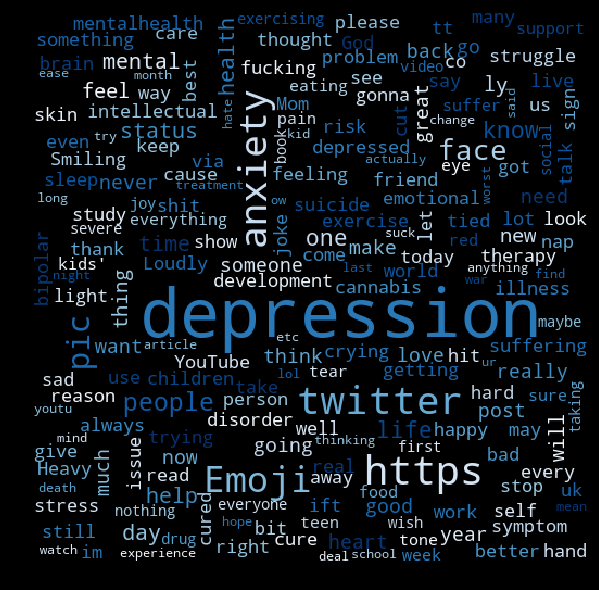

In [111]:
depressive_words = ' '.join(list(tweets[tweets['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

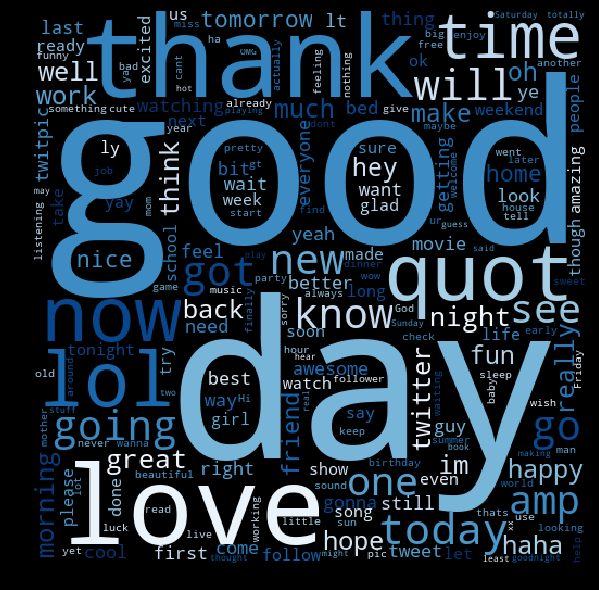

In [112]:
positive_words = ' '.join(list(tweets[tweets['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

#Pre-processing the data for the training: Tokenization, stemming, and removal of stop words

In [124]:
depressive_words

'The lack of this understanding is a small but significant part of what causes anxiety & depression to both feel so incredibly lonely. It\'s soooo easy to compare. It\'s so easy to invalidate ourselves because of that. i just told my parents about my depression and it\'s so hard to get gen x people to understand that this is not something that i can control all the time or just cure with a walk or by keeping my mind busy depression is something i don\'t speak about even going through it because it\'s also such a double edged sword. i love every race. even if white people had done so much i can\'t hate them all. my grandma is legit white! how tf can i hate, i do dislike people though. Made myself a tortilla filled with pb&j. My depression is cured. Olivia:1 depression:0 @WorldofOutlaws I am gonna need depression meds soon, these rainouts are spinning my equilibrium out <Emoji: Pouting face> Mother Nature is being a mean B-T-H <Emoji: Face with symbols over mouth> my anxiety and my depre

In [113]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [114]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [115]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [116]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  1.0
Recall:  0.46808510638297873
F-score:  0.6376811594202899
Accuracy:  0.8798076923076923


In [117]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  1.0
Recall:  0.10638297872340426
F-score:  0.1923076923076923
Accuracy:  0.7980769230769231


# Predictions with TF-IDF

# Depressive Tweets

In [118]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)

True

In [119]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)


True

In [123]:
pm = process_message('I am not very happy. Feeling like not elated at all')
sc_tf_idf.classify(pm)

True

In [26]:
pm = process_message('I am officially done with @kanyewest')
sc_tf_idf.classify(pm)


True

In [44]:
pm = process_message('Feeling down...')
sc_tf_idf.classify(pm)


True

In [28]:
pm = process_message('My depression will not let me work out')
sc_tf_idf.classify(pm)


True

# Positive Tweets

In [29]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)


False

In [33]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_tf_idf.classify(pm)


False

In [34]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_tf_idf.classify(pm)

False

In [35]:
pm = process_message('It’s the little things that make me smile. Got our new car today and this arrived with it')
sc_tf_idf.classify(pm)

False

# Predictions with Bag-of-Words (BOW)

# Depressive tweets

In [40]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_bow.classify(pm)

True

In [42]:
pm = process_message('My depression will not let me work out')
sc_bow.classify(pm)

True

In [43]:
pm = process_message('Feeling down...')
sc_bow.classify(pm)

False

# Positive Tweets

In [45]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_bow.classify(pm)

False

In [46]:
pm = process_message('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_bow.classify(pm)

False

In [48]:
pm = process_message('Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy')
sc_bow.classify(pm)

False